In [2]:
from ultralytics import YOLO
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
import PIL.ImageFile
import ultralytics.engine.results as results
import PIL
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from importlib import reload

def plot_gt(path,ax):
    data=np.loadtxt(path.replace("images", "labels").replace("jpg","txt")).T
    # print(data)
    cls = data[0]
    bboxes = data[1:-1].T
    z = data[-1]
    # print(bboxes)
    img = PIL.Image.open(path)
    ax.imshow(np.array(img))
    ax.axis("off")
    for bbox,z_value in zip(bboxes,z):
        x,y,w,h = bbox*512
        rect = Rectangle((x-0.5*w,y-0.5*h),h,w, linewidth=1, edgecolor="blue", facecolor='none')
        ax.text(*rect.get_xy(),f"z={z_value:.3f}")
        ax.add_patch(rect)

In [3]:
# reload(results)
model = YOLO("runs/zaxis/train15/weights/last.pt")
# print(model.model.model)
print("loaded")
test_images = os.listdir("data_gen/dataset_2/images/test")
random_image = lambda: "data_gen/dataset_2/images/test/"+test_images[np.random.randint(0,len(test_images))]



loaded



image 1/1 /home/jupyter-till/git/ultralytics/data_gen/dataset_2/images/test/image_00448.jpg: 512x512 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)


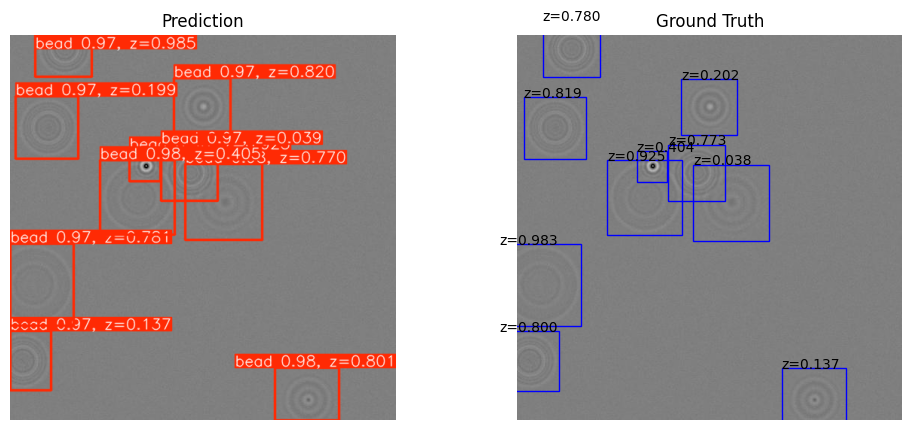

In [9]:

plt.figure(figsize=(12,5))
image = random_image()
results = model.predict(image)
res = results[0].plot()
plt.subplot(1,2,1)
plt.title("Prediction")
plt.imshow(res)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Ground Truth")

plot_gt(image,plt.gca())
plt.show()

In [13]:
image

'data_gen/dataset_2/images/test/image_00177.jpg'

In [18]:
model2 = YOLO("runs/detect/train/weights/last.pt")
# print(model.model.model)
print("loaded")


loaded



image 1/1 /home/jupyter-till/git/ultralytics/data_gen/dataset_2/images/test/image_00177.jpg: 512x512 10 beads, 15.4ms
Speed: 2.3ms preprocess, 15.4ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 512)


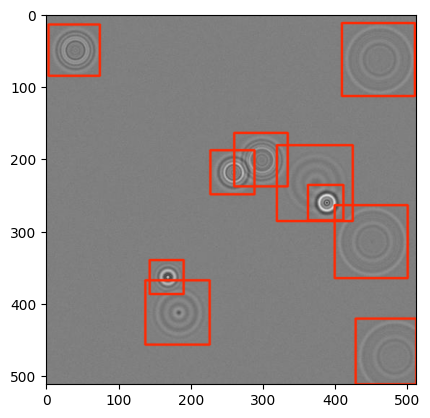

In [23]:
res = model2.predict(image)

res = res[0].plot()
plt.imshow(res)